# Example for reading depth data file

In [24]:
import zlib
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [25]:
depth_path = '/tmp/Depth'

# Depth data parameters
w = 640
h = 480

### Read and decompress the depth data

In [26]:
with open(depth_path, 'rb') as f:
    data = zlib.decompress(f.read(), -15)

In [27]:
FRAME_COUNT = int(len(data) / w / h / 2)

### Convert bytes to numpy array and set NaNs to zero

In [28]:
frames = np.frombuffer(data, np.float16).reshape(FRAME_COUNT,h,w).copy()
frames = np.nan_to_num(frames, 0)

### Preprocess data for visualization

In [29]:
maxim = frames.max()
imgs = (frames / maxim * 255.0).astype('uint8')

### Show one frame

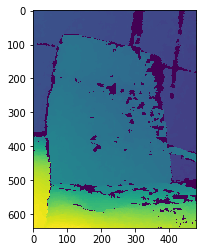

In [30]:
plt.imshow(np.flip(imgs[0,:,:].T, axis=1))

### Write depth video to a  file

In [31]:
FPS = 25 # TODO: figure out the correct fps
fourcc = cv2.VideoWriter_fourcc(*'mpv4')
out = cv2.VideoWriter('depth_video.mp4',fourcc, FPS, (h,w))

for i in range(FRAME_COUNT):
    out.write(cv2.cvtColor(np.flip(imgs[i,:,:].T, axis=1), cv2.COLOR_GRAY2BGR))

out.release()